In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directories
data_dir = 'dataset'  # Update with the actual path

# Define image parameters
batch_size = 32
img_height, img_width = 224, 224  # Resized dimensions

# Create image data generators
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_data_gen = ImageDataGenerator(rescale=1.0 / 255)

# Load data from directories
train_ds = train_data_gen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='training'
)

# Extract class names from the directory structure
class_names = sorted(train_ds.class_indices.keys())
print("Class names:", class_names)

Found 230 images belonging to 2 classes.
Class names: ['full-sleeves', 'half-sleeves']


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [6]:
# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)  # 2 classes: half sleeves and full sleeves

model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Save the model
model.save('sleeve_classifier.h5')
print("Model saved successfully!")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 149s 3us/step


NameError: name 'train_images' is not defined

In [7]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
data_dir = pathlib.Path('dataset')
batch_size = 55
image_height = 216
image_width = 216

In [10]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1, 
    subset="training",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation", 
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

Found 230 files belonging to 2 classes.
Using 207 files for training.


Found 230 files belonging to 2 classes.
Using 23 files for validation.


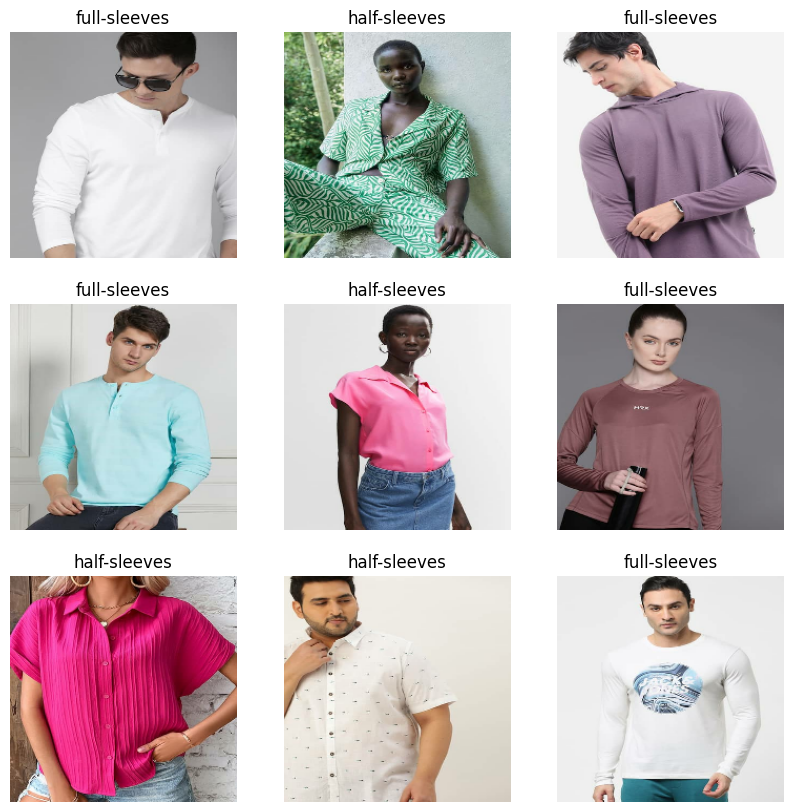

In [11]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [15]:
# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(216, 216, 3))

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)  # 2 classes: half sleeves and full sleeves

model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
epochs=40
history=model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step - accuracy: 0.4285 - loss: 57.2183 - val_accuracy: 0.6957 - val_loss: 9.0051
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 7s/step - accuracy: 0.5562 - loss: 30.8341 - val_accuracy: 0.3043 - val_loss: 0.8086
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step - accuracy: 0.5127 - loss: 0.9425 - val_accuracy: 0.3043 - val_loss: 0.7137
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 8s/step - accuracy: 0.5230 - loss: 3.4681 - val_accuracy: 0.6957 - val_loss: 1.0748
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 8s/step - accuracy: 0.5614 - loss: 1.1244 - val_accuracy: 0.5217 - val_loss: 0.6941
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 8s/step - accuracy: 0.5561 - loss: 1.1520 - val_accuracy: 0.6957 - val_loss: 0.6756
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step - accuracy: 0.5519 - loss: 0.7700 - val_accuracy: 0.3478 - val_loss: 0.6918
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step - accuracy: 0.4552 - loss: 0.7178 - val_accuracy: 0.6957 - val_loss: 0.6956
Epoch 

In [ ]:
model.save('Sleeves_classifier.h5')

In [ ]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
test_dir = pathlib.Path('Test')
dino_paths = list(test_dir.glob('*.jpg'))
class_names = ['full-sleeves', 'half-sleeves']

plt.figure(figsize=(10, 10))

for i, dino_path in enumerate(dino_paths):
    dino_img = keras.preprocessing.image.load_img(dino_path, target_size=(216, 216))
    img_arr = keras.preprocessing.image.img_to_array(dino_img)
    img_arr = tf.expand_dims(img_arr, 0)
    
    predictions = model.predict(img_arr)
    
    score = tf.nn.softmax(predictions[0])
    percent = int(round(100*np.max(score), 0))
    title = "{} - {} %".format(class_names[np.argmax(score)], percent)
    
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(dino_img)
    plt.title(title)
    plt.axis("off")